# Data Processing & Cleaning

In [2]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('diabetes.csv') # Read the data

In [4]:
print(df.isnull().sum()) # detect missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
df.duplicated().sum() # detect duplicated values

0

In [6]:
df.head() # display first 5 row

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape # display amount of data

(768, 9)

In [8]:
df.info() # display format of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe() # display stats of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Analysis

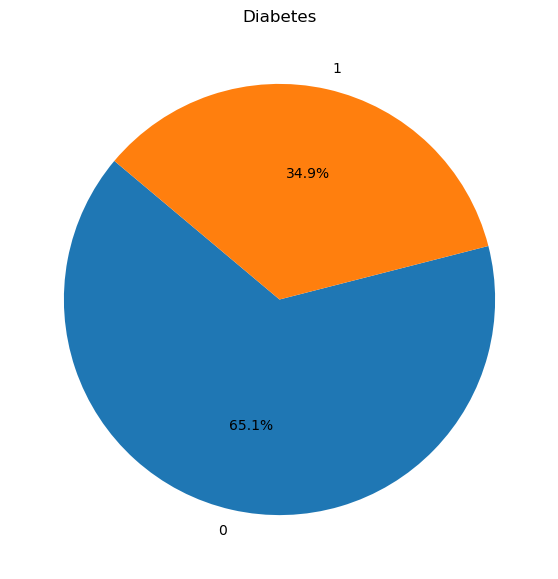

In [55]:
outcome_percentage = df['Outcome'].value_counts()

#  pie chart for percentage of people have diabets and peopl don't have
plt.figure(figsize=(7, 7))
plt.pie(outcome_percentage, labels=outcome_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes')

plt.show()

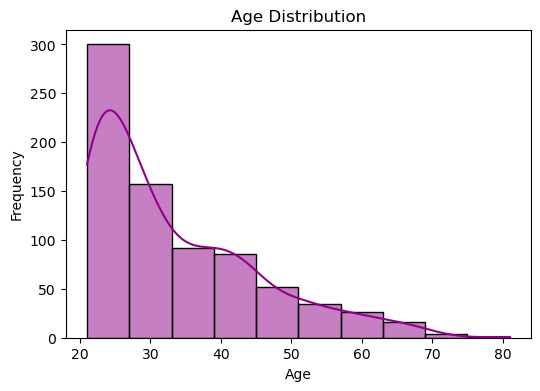

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", bins=10, kde=True, color="#91008a")
# display age distribution
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [12]:
high_bmi = df[df['BMI'] >= 30]


diabetic_high_bmi = high_bmi[high_bmi['Outcome'] == 1]


percentage = (len(diabetic_high_bmi) / len(high_bmi)) * 100

print(f" percentage of BMI >= 30 have diabets : {percentage:.2f}%")

 percentage of BMI >= 30 have diabets : 46.40%


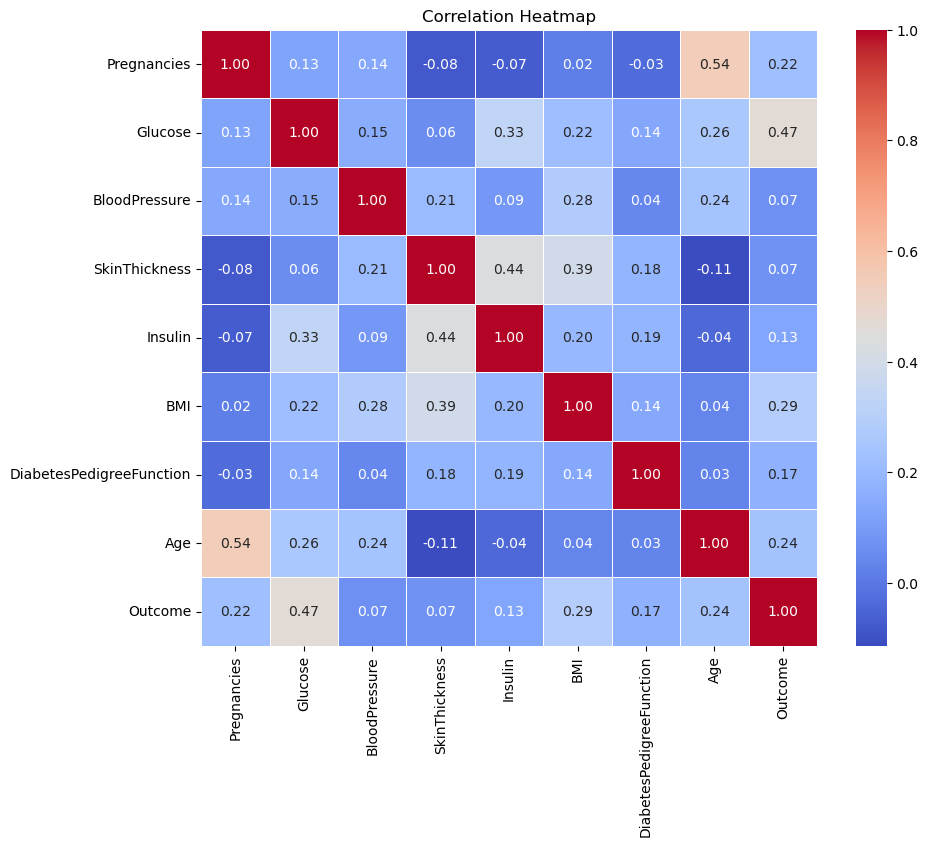

In [13]:
# display correlation of each data
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

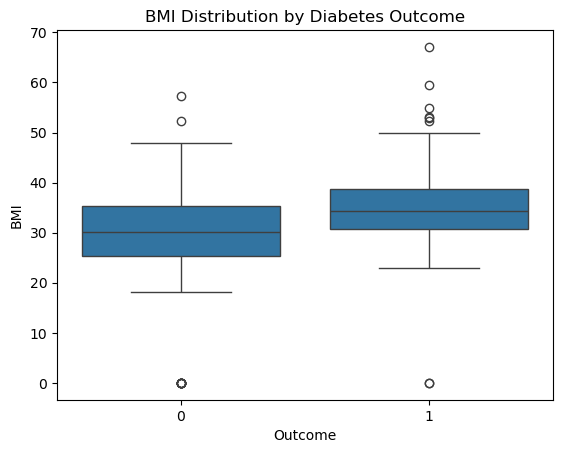

In [14]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()

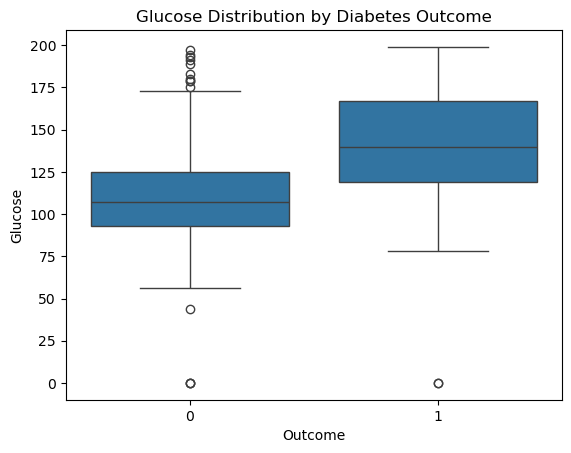

In [15]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Distribution by Diabetes Outcome')
plt.show()

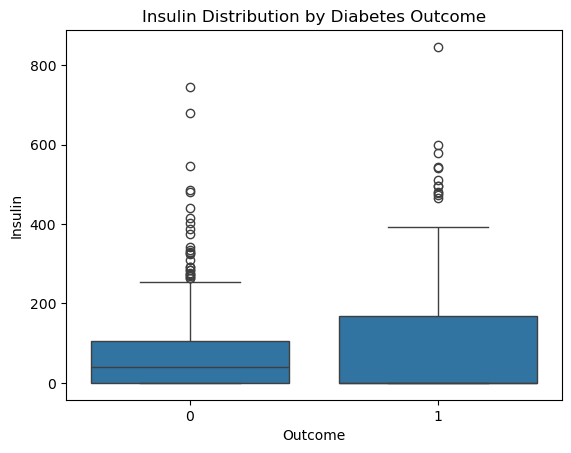

In [16]:
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title('Insulin Distribution by Diabetes Outcome')
plt.show()

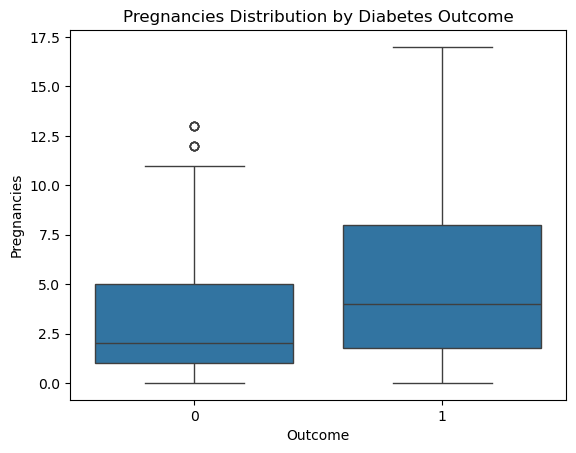

In [17]:
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Pregnancies Distribution by Diabetes Outcome')
plt.show()

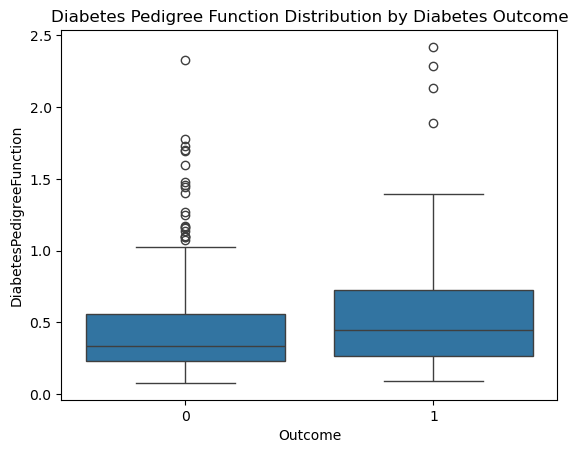

In [18]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Diabetes Pedigree Function Distribution by Diabetes Outcome')
plt.show()

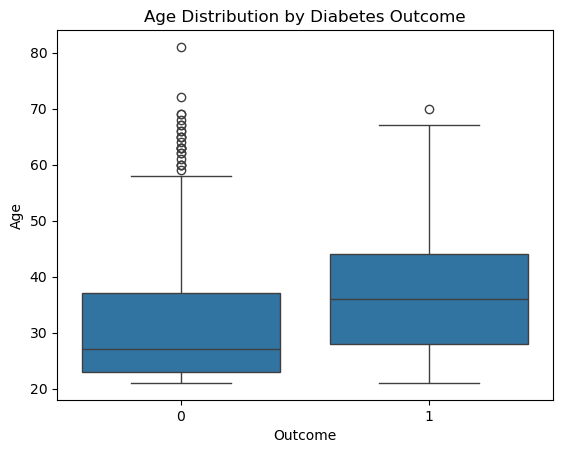

In [19]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

In [20]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [21]:
df.groupby("Outcome")[["Glucose", "BMI", "Age"]].mean()


,Glucose,BMI,Age
Outcome,,,
0,109.980000,30.304200,31.190000
1,141.257463,35.142537,37.067164


# Data Modeling

## <font color='blue'>Random Forest Classifier<font>


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [23]:
X = df.drop('Outcome', axis=1)  
y = df['Outcome']             

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# 1. Preparing RFC model
model = RandomForestClassifier(n_estimators=100, random_state=42)
# 2. train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# 3. predication of the data
y_pred = model.predict(X_test)


In [27]:
# 4. Model evaluation
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_rf:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [28]:
# test for the model
new_data = [[4, 100, 70, 30, 100, 25, 0.5, 50]]  # [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

predicted_outcome = model.predict(new_data)

print("Predicted Outcome:", predicted_outcome[0])  

Predicted Outcome: 0


C:\Users\Rone\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


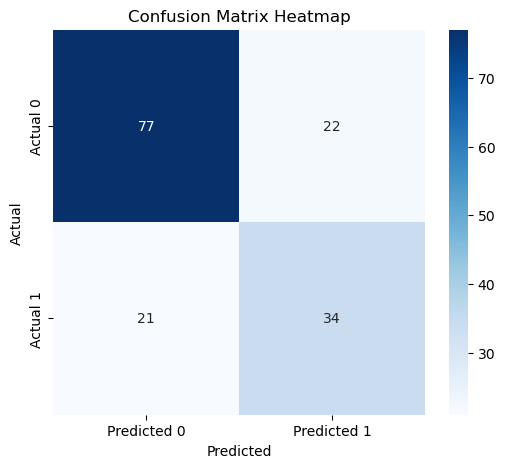

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# نرسم Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## <font color='green'>SVM<font>

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 1. Preparing SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# 2. train the model
svm_model.fit(X_train, y_train)

# 3. predication of the data
y_pred_svm = svm_model.predict(X_test)

# 4. Model evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.77
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



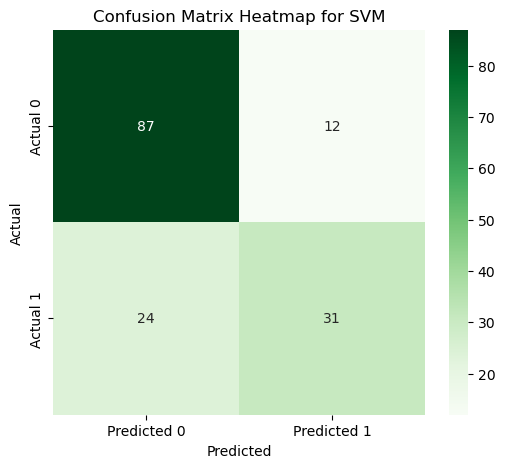

In [33]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
# test for the model
new_data = [[2, 200, 70, 30, 100, 40, 0.5, 50]]  # [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]


predicted_outcome = svm_model.predict(new_data)

print("Predicted Outcome:", predicted_outcome[0]) 

Predicted Outcome: 1


C:\Users\Rone\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## <font color='orange'> KNN<font>

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)
# 1. Preparing KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2. train the model
knn_model.fit(X_train, y_train)

# 3. predication of the data
y_pred_knn = knn_model.predict(X_test)

# 4. Model evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.66
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [36]:
# test for the model
new_data = [[4, 50, 70, 30, 40, 25, 0.5, 50]]  # [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

predicted_outcome = knn_model.predict(new_data)

print("Predicted Outcome:", predicted_outcome[0]) 

Predicted Outcome: 0


C:\Users\Rone\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


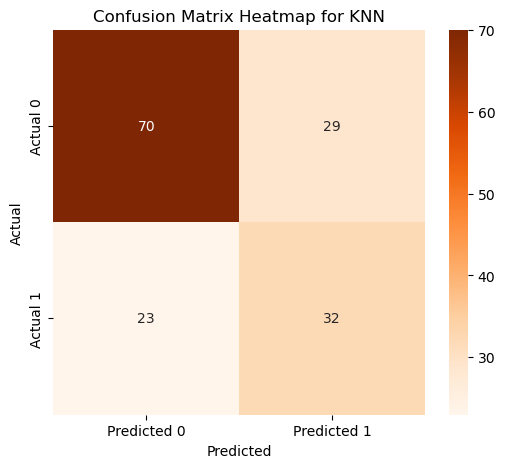

In [37]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap for KNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## <font color='purple'>Logistic Regression<font>

In [38]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)
# 1. Preparing LR model
logreg = LogisticRegression(max_iter=1000)
# 2. train the model
logreg.fit(X_train, y_train)
# 3. predication of the data
y_pred_logreg = logreg.predict(X_test)
# 4. Model evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [39]:
# test for the model
new_data = [[4, 50, 70, 30, 40, 25, 0.5, 50]]  # [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

predicted_outcome = logreg.predict(new_data)

print("Predicted Outcome:", predicted_outcome[0]) 

Predicted Outcome: 0


C:\Users\Rone\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


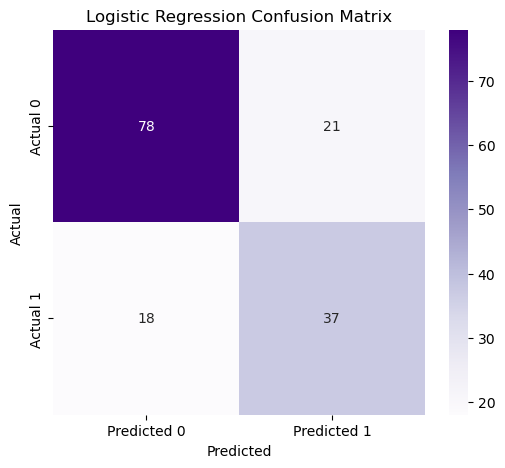

In [40]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6,5))

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## <font color='red'>Gradient Boosting Classifier<font>

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

# 1. Preparing GBC model
gb = GradientBoostingClassifier(random_state=42)
# 2. train the model
gb.fit(X_train, y_train)
# 3. predication of the model
y_pred_gb = gb.predict(X_test)
# 4. Model evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [42]:
# test for the model
new_data = [[4, 50, 70, 30, 40, 25, 0.5, 50]]  # [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

predicted_outcome = gb.predict(new_data)

print("Predicted Outcome:", predicted_outcome[0]) 

Predicted Outcome: 0


C:\Users\Rone\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


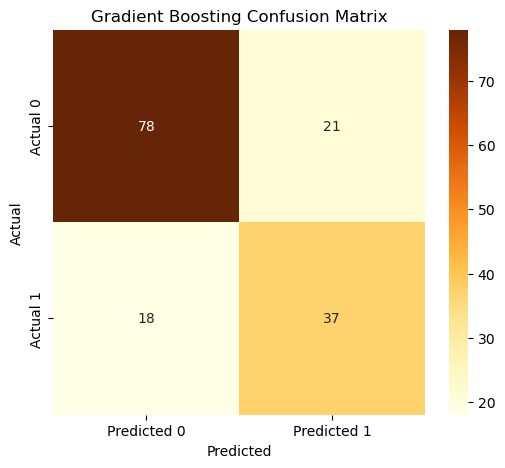

In [43]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,5))

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Gradient Boosting Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## <font color='cyan'>MLP Classifier<font>

In [44]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)
# 1. Preparing MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
# 2. train the model
mlp.fit(X_train, y_train)
# 3. predication of the model
y_pred_mlp = mlp.predict(X_test)
# 4. Model evaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Neural Network (MLP) Accuracy:", accuracy_mlp)
print(classification_report(y_test, y_pred_mlp))

Neural Network (MLP) Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154



In [45]:
# test for the model
new_data = [[4, 50, 70, 30, 40, 25, 0.5, 50]]  # [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

predicted_outcome = mlp.predict(new_data)

print("Predicted Outcome:", predicted_outcome[0]) 

Predicted Outcome: 0


C:\Users\Rone\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


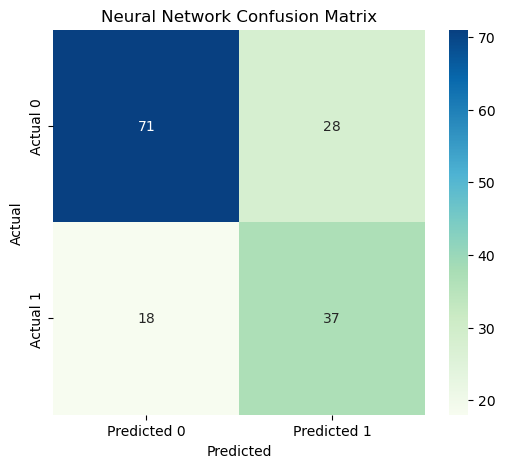

In [46]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(6,5))

sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='GnBu',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Neural Network Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# <font color= Gold>Comparison of Models Accuracy<font>

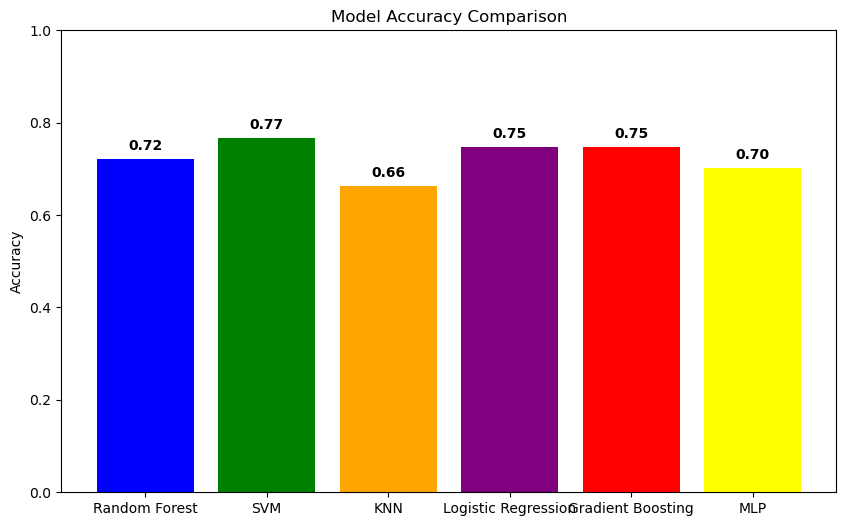

In [47]:
# taking each model accuracy
accuracies = [accuracy_rf, accuracy_svm, accuracy_knn, accuracy_logreg, accuracy_gb, accuracy_mlp]
# naming each model name
model_names = ['Random Forest', 'SVM', 'KNN', 'Logistic Regression', 'Gradient Boosting', 'MLP']

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'purple', 'red', 'yellow'])
plt.ylim(0,1) 
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()